## multiclass classification

The dataset is the digits dataset available from the sklearn's datasets library. This dataset contain 1797 samples of written digits. The goal is to correctly identify digits from 0 to 9.

I will train two models to perform multiclass classification and comapare their results. 

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import  classification_report, confusion_matrix

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


In [13]:
digits = load_digits()
X, y = load_digits(return_X_y=True)

In [11]:
print(f'the number of rows and featurse in the dataset is: {X.shape}')

the number of rows and featurse in the dataset is: (1797, 64)


A visual representation of the digits data set.

<Figure size 432x288 with 0 Axes>

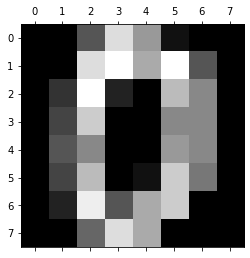

In [16]:
>>> plt.gray() 
>>> plt.matshow(digits.images[0]) 
>>> plt.show() 

Numpy's bincount will show how many samples belong to each class. We can see the datset is balanced.

In [18]:
np.bincount(y)

array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.2, random_state=20
)

### Logistic Regression

First we will create a logistic regression classifier and use 5-fold cross validation to train the model.

We set multi-class to OvR (one vs rest)

OvR simply breaks the problem down into a series of binary problems. 


In [31]:
lr_classifier = LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=1000, random_state=20)
lr_classifier.fit(X_train, y_train)
lr_cv_score = cross_val_score(lr_classifier, X_test, y_test, cv=5)


In [32]:
print(f'Accuracy scores for the 5 folds:{lr_cv_score}')
print(f'Mean cross validation score:{lr_cv_score.mean()}')

Accuracy scores for the 5 folds:[0.95833333 0.95833333 0.95833333 0.90277778 0.94444444]
Mean cross validation score:0.9444444444444444


In [38]:
preds = lr_classifier.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.94      0.97      0.95        31
           2       0.97      1.00      0.98        28
           3       0.97      1.00      0.99        38
           4       1.00      1.00      1.00        41
           5       1.00      0.94      0.97        33
           6       1.00      0.98      0.99        45
           7       0.97      0.97      0.97        40
           8       0.97      0.94      0.96        35
           9       0.94      0.97      0.95        32

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



### Random Forest

Now we will perform the same steps, this time using a random forest classifier.


In [41]:
rf_classifier = RandomForestClassifier(n_estimators=24, criterion='entropy', )
rf_classifier.fit(X_train, y_train)
rf_cv_score = cross_val_score(rf_classifier, X_test, y_test, cv=5)

In [42]:
print(f'Accuracy scores for the 5 folds:{rf_cv_score}')
print(f'Mean cross validation score:{rf_cv_score.mean()}')

Accuracy scores for the 5 folds:[0.90277778 0.90277778 0.97222222 0.94444444 0.90277778]
Mean cross validation score:0.925


In [43]:
preds = rf_classifier.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.94      1.00      0.97        31
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        38
           4       1.00      0.98      0.99        41
           5       0.97      0.97      0.97        33
           6       1.00      0.98      0.99        45
           7       1.00      1.00      1.00        40
           8       1.00      1.00      1.00        35
           9       0.94      0.94      0.94        32

    accuracy                           0.99       360
   macro avg       0.98      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



### Analysis

Overall, the logistic regression model performed better than the random forest. In larger datasets, random forest tends to outperform logisitc regression. To improve the logisitc regression model I could perform a grid search and tune the hyperparameter. 

I could also further tune the random forest.... For example changing the criteron to entropy rather than gini provided a significant increase in accuracy. 